<a href="https://colab.research.google.com/github/keymemory/DYC_Machine_Learning/blob/main/ML_day4_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 준비하기


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

raw_data = pd.read_excel('/content/titanic.xls')
raw_data.info()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


생존률 확인


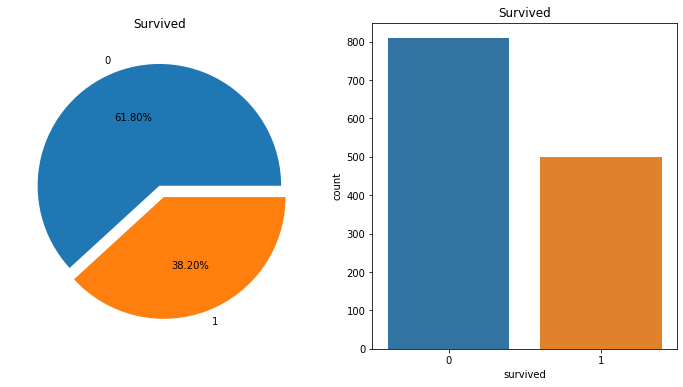

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()


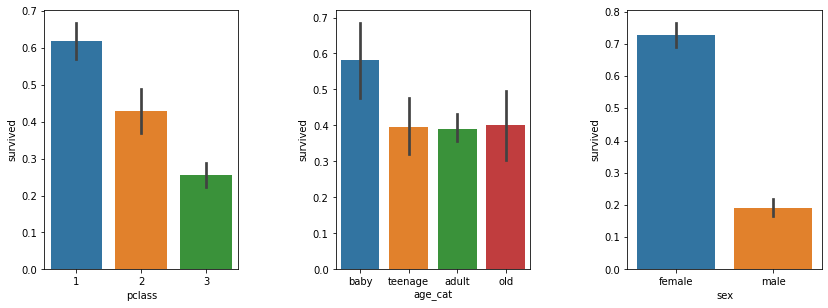

In [ ]:
raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0, 10, 20, 50, 100], 
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)
plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()


데이터 전처리


In [ ]:
#여성을 1로 남성을 0으로 두고, 몇몇 데이터를 float형으로 선언하고, nan이 있는 데이터는 제거
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(1)
    elif each == 'male':
        tmp.append(0)
    else:
        tmp.append(np.nan)

raw_data['sex'] = tmp

raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

raw_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   float64 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   float64 
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
dtypes: category(1), float64(8), object(6)
memory usage: 123.7+ KB


데이터셋 생성하기 - 데이터 선별


In [ ]:
#학습 데이터, 테스트 데이터(10%) 선별

#pclass : 객실 등급
#survived : 생존 유무
#sex : 성별
#age : 나이
#sibsp : 형제 혹은 부부의 수
#parch : 부모, 혹은 자녀의 수
#fare : 지불한 운임
#boat : 탈출한 보트가 있다면 boat 번호

x_data = raw_data.values[:, [0,3,4,5,6,8]]
y_data = raw_data.values[:, [1]] #survived

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.1, random_state=7)
                                                   
print(y_train.size)
print(y_test.size)


940
105


모델 구성하기


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 255)               1785      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 256       
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


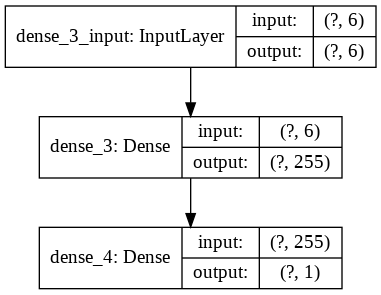

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense
np.random.seed(7)

model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)


모델 학습과정 설정하기


In [ ]:
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])


모델 학습시키기


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)


Train on 940 samples, validate on 105 samples
Epoch 1/500
940/940 [==============================] - 0s 318us/step - loss: 0.2308 - accuracy: 0.6734 - val_loss: 0.2052 - val_accuracy: 0.6952
Epoch 2/500
940/940 [==============================] - 0s 40us/step - loss: 0.2189 - accuracy: 0.6862 - val_loss: 0.1968 - val_accuracy: 0.6952
Epoch 3/500
940/940 [==============================] - 0s 40us/step - loss: 0.2085 - accuracy: 0.6979 - val_loss: 0.1992 - val_accuracy: 0.7238
Epoch 4/500
940/940 [==============================] - 0s 39us/step - loss: 0.1937 - accuracy: 0.7106 - val_loss: 0.1837 - val_accuracy: 0.7429
Epoch 5/500
940/940 [==============================] - 0s 41us/step - loss: 0.1833 - accuracy: 0.7394 - val_loss: 0.1749 - val_accuracy: 0.8095
Epoch 6/500
940/940 [==============================] - 0s 42us/step - loss: 0.1709 - accuracy: 0.7702 - val_loss: 0.1605 - val_accuracy: 0.8095
Epoch 7/500
940/940 [==============================] - 0s 42us/step - loss: 0.1712 - accu

학습결과 그리기


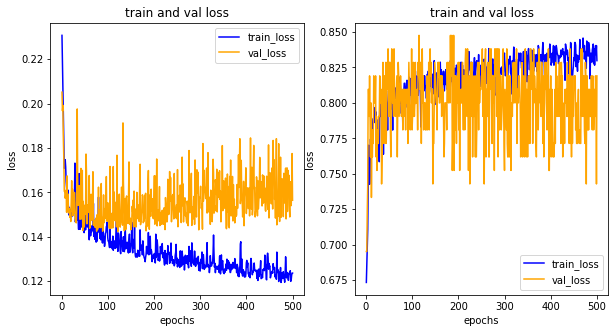

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()


모델 평가하기


In [ ]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


105/105 [==============================] - 0s 49us/step
accuracy: 81.90%


디카프리오는 정말 살 수 없었을까?


In [ ]:
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1,6) #3등실 탑승, 남성, 19살, 형재없고, 부모나 자녀없음, 싼 가격으로 표를 삼
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1,6) #1등실 탑승, 여성, 17살,  운임은 비싸게 주었고, 부모와 함께 탑승하고, 약혼자도 있었다


In [ ]:
model.predict(dicaprio) #어차피 죽을 운명


array([[0.16285749]], dtype=float32)

In [ ]:
model.predict(dicaprio) #어차피 죽을 운명


array([[0.16285749]], dtype=float32)

In [ ]:
model.predict_classes(dicaprio)


array([[0]], dtype=int32)

In [ ]:
model.predict_classes(winslet)


array([[1]], dtype=int32)